# Generating labels and bounding boxes in text file format

In [8]:
import pandas as pd

In [9]:
labels= pd.read_csv(r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_train_labelsd\stage_2_train_labels.csv')

## Taking only patient Ids having target=1

In [10]:
df=labels[labels['Target']==1]

In [11]:
df['patientId'].nunique()

6012

There are 6012 patients having pneumonia

### Bounding box in Yolov5 format:

In [12]:
df['x'] = df['x']/1024 + df['width'] / 2048
df['y'] = df['y']/1024 + df['height'] / 2048
df['width'] = df['width'] /1024
df['height'] = df['height']/1024

C:\Users\vikra\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vikra\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vikra\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [13]:
df.drop('Target',axis=1,inplace=True)

In [14]:
for index, patient_id in enumerate(df['patientId'].T.to_dict().values()):
    
    file_name ='{0}.txt'.format(patient_id)
    rows = df[df['patientId']==patient_id]
    row_data = list(rows.T.to_dict().values())
    #print(row_data)
    with open(file_name, 'w') as f:
        for row in row_data:
            f.write(str(0))
            f.write(' ')
            f.write(str(row['x']))
            f.write(' ')
            f.write(str(row['y']))
            f.write(' ')
            f.write(str(row['width']))
            f.write(' ')
            f.write(str(row['height']))
            f.write("\n")
            #f.close()  
        f.close()


shape of dcm images:

In [19]:
import pydicom as dicom
import os
import cv2
import PIL
from pydicom import dcmread
#folder_path = r"C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_train"
# Specify the output jpg/png folder path
folder_path = r"C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\trainjpg1024"
images_path = os.listdir(folder_path)
for image in images_path:
    ds = cv2.imread(os.path.join(folder_path, image))
    
    print(ds.shape)

(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1

KeyboardInterrupt: 

## Converting DCM images to JPG format

In [18]:
import pydicom as dicom
import os
import cv2
import PIL # optional
from pydicom import dcmread

# Specifying .dcm folder path
folder_path = r"C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_trainonlyp"
# Specifying the output jpg folder path
jpg_folder_path = r"C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\trainjpg1024"
images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    ds = dcmread(os.path.join(folder_path, image))
    pixel_array_numpy = ds.pixel_array
    pixel_array_numpy = cv2.resize(pixel_array_numpy, (1024, 1024), interpolation=cv2.INTER_NEAREST)
    
    image = image.replace('.dcm', '.jpg')
    
    cv2.imwrite(os.path.join(jpg_folder_path, image), pixel_array_numpy)
    if n % 50 == 0:
        print('{} image converted'.format(n))

0 image converted
50 image converted
100 image converted
150 image converted
200 image converted
250 image converted
300 image converted
350 image converted
400 image converted
450 image converted
500 image converted
550 image converted
600 image converted
650 image converted
700 image converted
750 image converted
800 image converted
850 image converted
900 image converted
950 image converted
1000 image converted
1050 image converted
1100 image converted
1150 image converted
1200 image converted
1250 image converted
1300 image converted
1350 image converted
1400 image converted
1450 image converted
1500 image converted
1550 image converted
1600 image converted
1650 image converted
1700 image converted
1750 image converted
1800 image converted
1850 image converted
1900 image converted
1950 image converted
2000 image converted
2050 image converted
2100 image converted
2150 image converted
2200 image converted
2250 image converted
2300 image converted
2350 image converted
2400 image conv

Copying data from one folder to another

Creating list of files:

In [34]:
from pathlib import Path
import shutil
 
src=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\trainjpg1024'


files=os.listdir(src)
l=[]
   
for idx,fname in enumerate(files):
   
    l.append(os.path.splitext(fname)[0])
        

In [33]:
len(l)

6012

In [35]:
l

['000db696-cf54-4385-b10b-6b16fbb3f985',
 '000fe35a-2649-43d4-b027-e67796d412e0',
 '001031d9-f904-4a23-b3e5-2c088acd19c6',
 '001916b8-3d30-4935-a5d1-8eaddb1646cd',
 '0022073f-cec8-42ec-ab5f-bc2314649235',
 '002cb550-2e31-42f1-a29d-fbc279977e71',
 '00436515-870c-4b36-a041-de91049b9ab4',
 '00704310-78a8-4b38-8475-49f4573b2dbb',
 '0087bd3a-55a7-4045-b111-b018fa52d361',
 '00a05408-8291-4231-886e-13763e103161',
 '00aecb01-a116-45a2-956c-08d2fa55433f',
 '00c0b293-48e7-4e16-ac76-9269ba535a62',
 '00eeb3c9-a892-4fac-a67a-aaa6cc7ffd5c',
 '00f08de1-517e-4652-a04f-d1dc9ee48593',
 '0100515c-5204-4f31-98e0-f35e4b00004a',
 '0101174b-6643-4d4e-b4ba-b6d41d0ce46a',
 '010ccb9f-6d46-4380-af11-84f87397a1b8',
 '012a5620-d082-4bb8-9b3b-e72d8938000c',
 '013c7df0-d66d-4cb1-b3bc-a70085160311',
 '0174c4bb-28f5-41e3-a13f-a396badc18bd',
 '018951e6-9fb3-4e92-8ce7-e3a018daf93f',
 '019d950b-dd38-4cf3-a686-527a75728be6',
 '01a6eaa6-222f-4ea8-9874-bbd89dc1a1ce',
 '01a7353d-25bb-4ff8-916b-f50dd541dccf',
 '01adfd2f-7bc7-

copying:

In [82]:
from pathlib import Path
import shutil
 
# defining source and destination
# paths
src=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\text'
trg = r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\Newfolder'


#files=os.listdir(src)

    # iterating over all the files in
    # the source directory
for f in l[3000:3200]:
    path=os.path.join(src, f)
    path=path+'.txt'
    
        
    shutil.copy2(path, trg)
        

In [41]:
l[1000]

'320fb85d-09c5-4c0b-be25-91c0086c2c51'

In [ ]:
#0:800  800:1000 800 3000 3000 3200

# Results

### Taking 1000 images

In [67]:
df = pd.read_csv(r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\results177.csv')

In [68]:
lc=df.columns

In [69]:
lc

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')

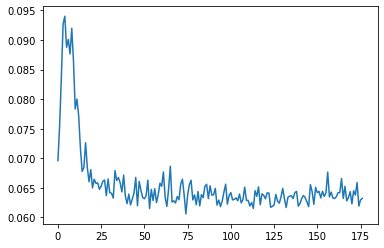

In [71]:
plt.plot(df[lc[0]],df[lc[8]])

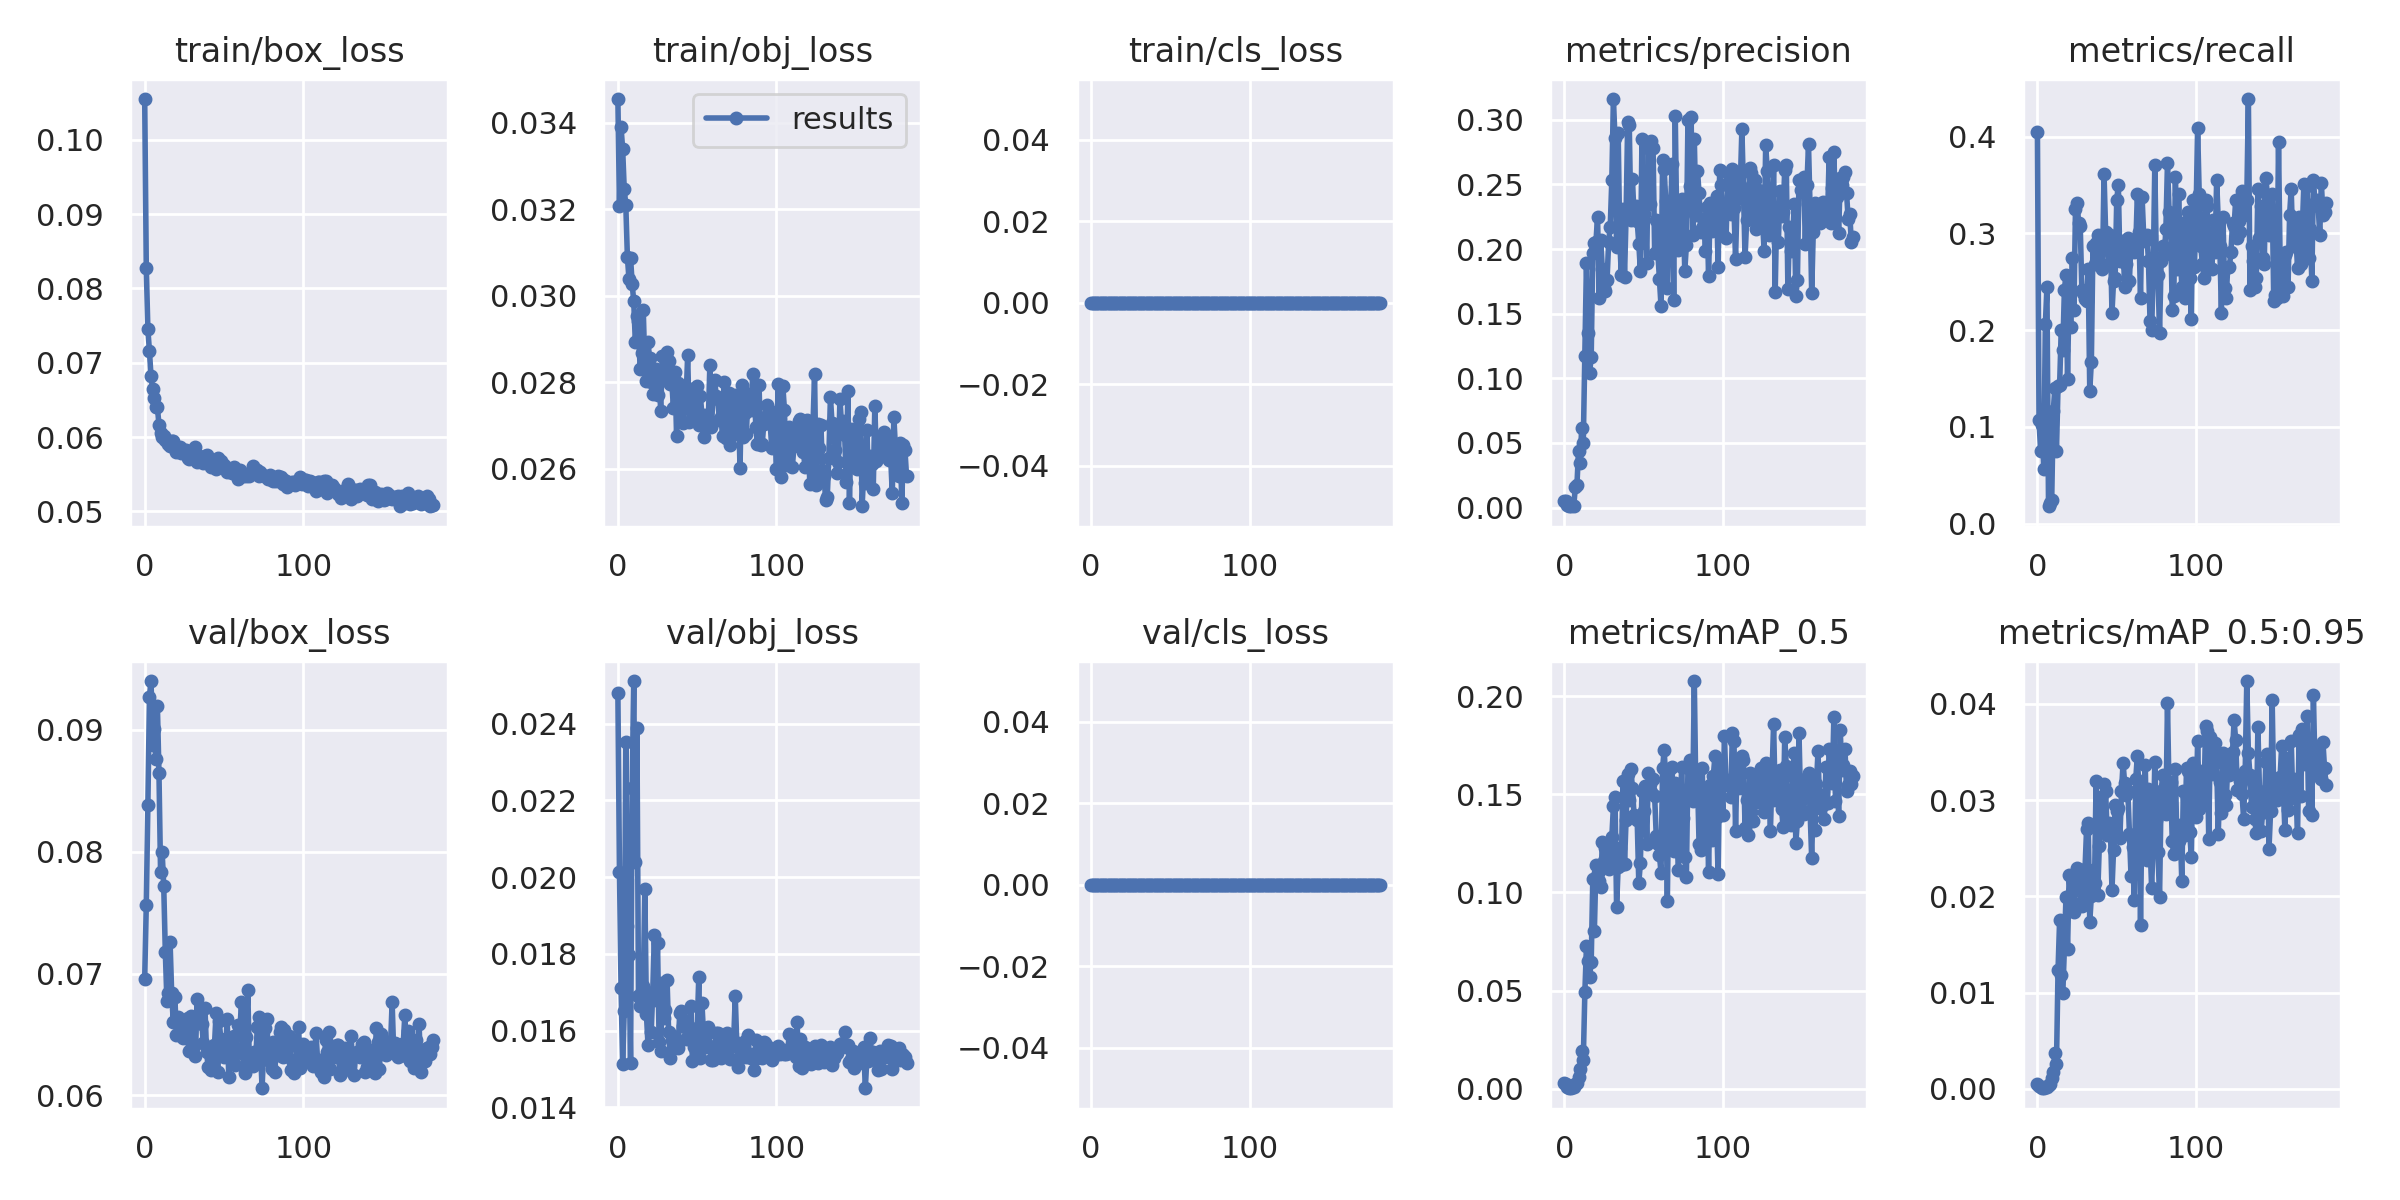

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\vikra\Downloads\yolov5s_results\results.png')

Plotting actual bounding boxes and predicted bounding boxes:

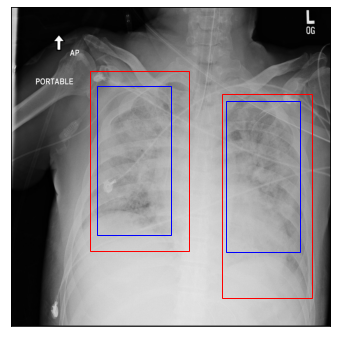

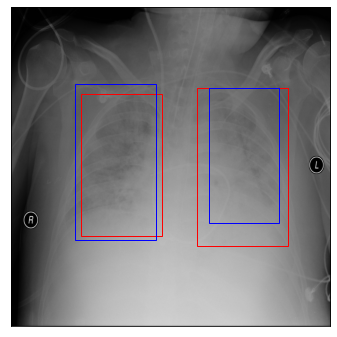

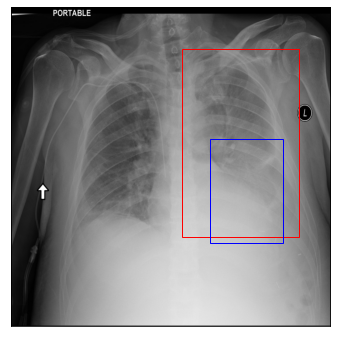

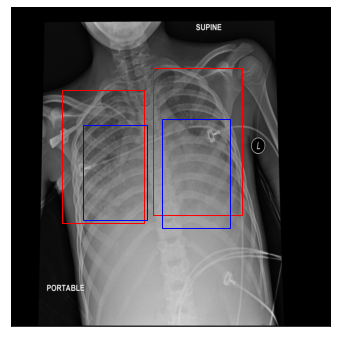

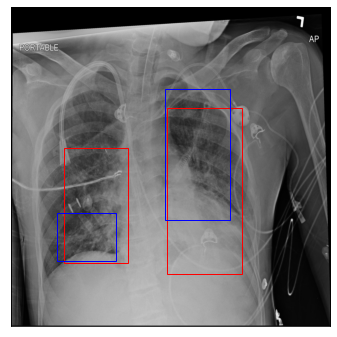

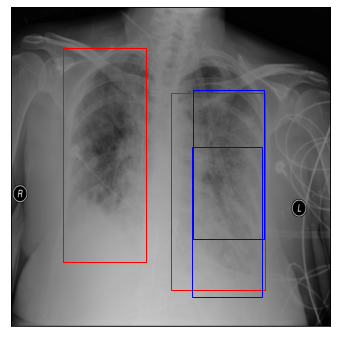

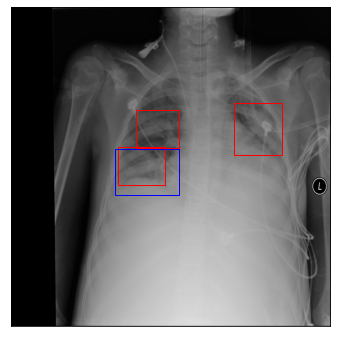

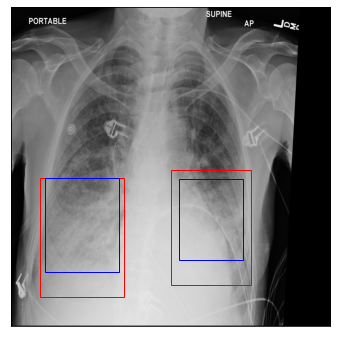

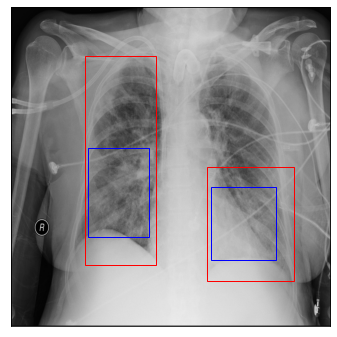

In [84]:
src=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\exp10003\labels'
lf=[]
for idx,fname in enumerate(os.listdir(src)):
    a=os.path.splitext(fname)[0]
    lf.append(a)
for idx, a in enumerate(lf[0:9]):
    plt.figure(figsize=(20,20))
    plt.subplot(3, 3, idx+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    label_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\Newfolder'
    images_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\Newfolder'
    label_path2=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\exp10003\labels'
    ll=[]
    a_file = open(os.path.join(label_path,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll.append(line_list)
    a_file.close()
    ll2=[]
    a_file = open(os.path.join(label_path2,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll2.append(line_list)
    a_file.close()
    current_axis = plt.gca()
    img=cv2.imread(os.path.join(images_path,a+'.jpg'))
        #img=cv2.imread(r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\val\2a9035ed-ec09-404d-adc3-d37688adf50a.jpg')
    plt.imshow(img,cmap='bone')
    current_axis = plt.gca()
    for box in ll:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=1))
    current_axis = plt.gca()
    for box in ll2:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='blue', fill=False, linewidth=1))


### Taking 3000 images

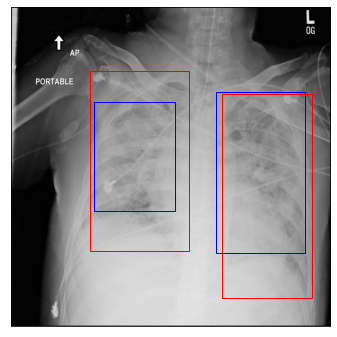

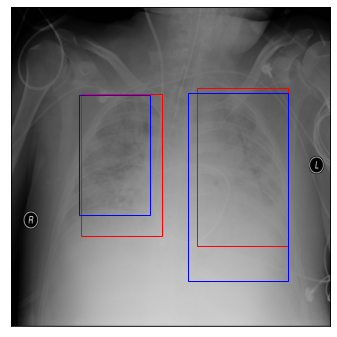

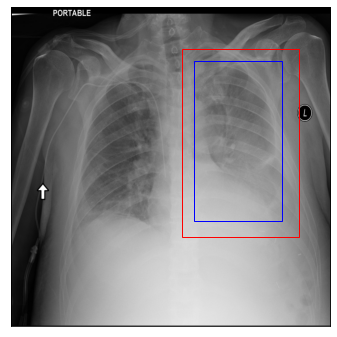

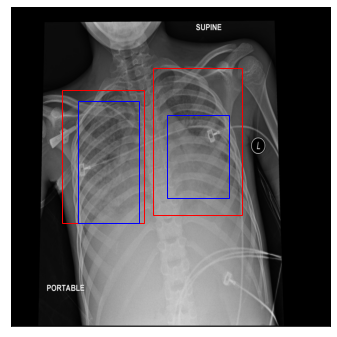

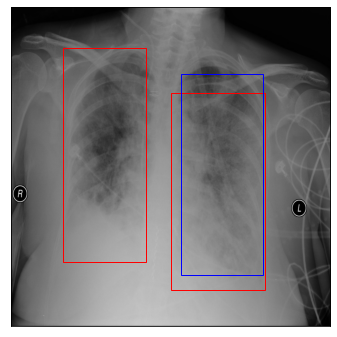

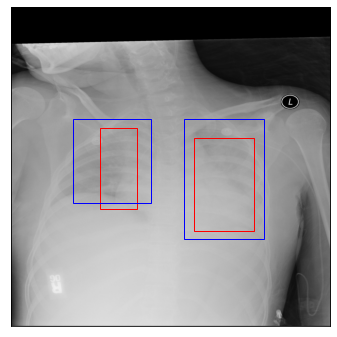

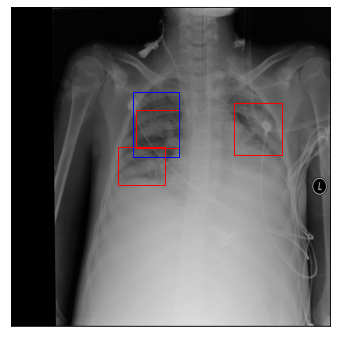

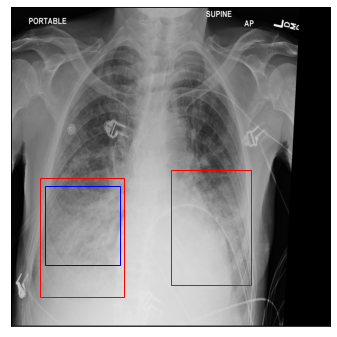

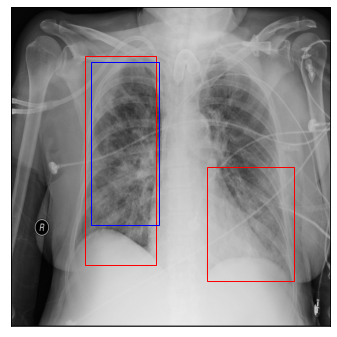

In [85]:
src=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\yl_3000_3000_3200\labels'
lf=[]
for idx,fname in enumerate(os.listdir(src)):
    a=os.path.splitext(fname)[0]
    lf.append(a)
for idx, a in enumerate(lf[0:9]):
    plt.figure(figsize=(20,20))
    plt.subplot(3, 3, idx+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    label_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\Newfolder'
    images_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\Newfolder'
    label_path2=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\yl_3000_3000_3200\labels'
    ll=[]
    a_file = open(os.path.join(label_path,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll.append(line_list)
    a_file.close()
    ll2=[]
    a_file = open(os.path.join(label_path2,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll2.append(line_list)
    a_file.close()
    current_axis = plt.gca()
    img=cv2.imread(os.path.join(images_path,a+'.jpg'))
        #img=cv2.imread(r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\val\2a9035ed-ec09-404d-adc3-d37688adf50a.jpg')
    plt.imshow(img,cmap='bone')
    current_axis = plt.gca()
    for box in ll:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=1))
    current_axis = plt.gca()
    for box in ll2:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='blue', fill=False, linewidth=1))


IOU ha improved a little by taking more training data